In [18]:
# music21 and Musescore are necessary to install this way.
# Lets you display sheet music from a midi file.
!pip install --upgrade music21

!add-apt-repository ppa:mscore-ubuntu/mscore-stable -y
!apt-get update
!apt-get install musescore

!apt-get install xvfb

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graph

In [19]:
# Some more setup, this is required to *play* music.
!apt install fluidsynth
!cp /usr/share/sounds/sf2/FluidR3_GM.sf2 ./font.sf2
!pip install midi2audio
!pip install pretty_midi
!pip install pyfluidsynth

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fluidsynth is already the newest version (1.1.9-1).
0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.


In [20]:
from music21 import *
import music21
us = environment.UserSettings()
us['musescoreDirectPNGPath'] = '/usr/bin/mscore'
us['directoryScratch'] = '/tmp'

from midi2audio import FluidSynth
from IPython.display import Audio
import sys
from google.colab import drive
from pretty_midi import PrettyMIDI

# Mount the right filepath.
drive.mount('/content/drive')
%cd /content/drive/MyDrive/CSCI4155Project/Music

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/CSCI4155Project/Music


In [21]:
midi_file = "Input1-allegro-grazioso.mid" # song to play .

# Play the midi file.
music = PrettyMIDI(midi_file=midi_file)

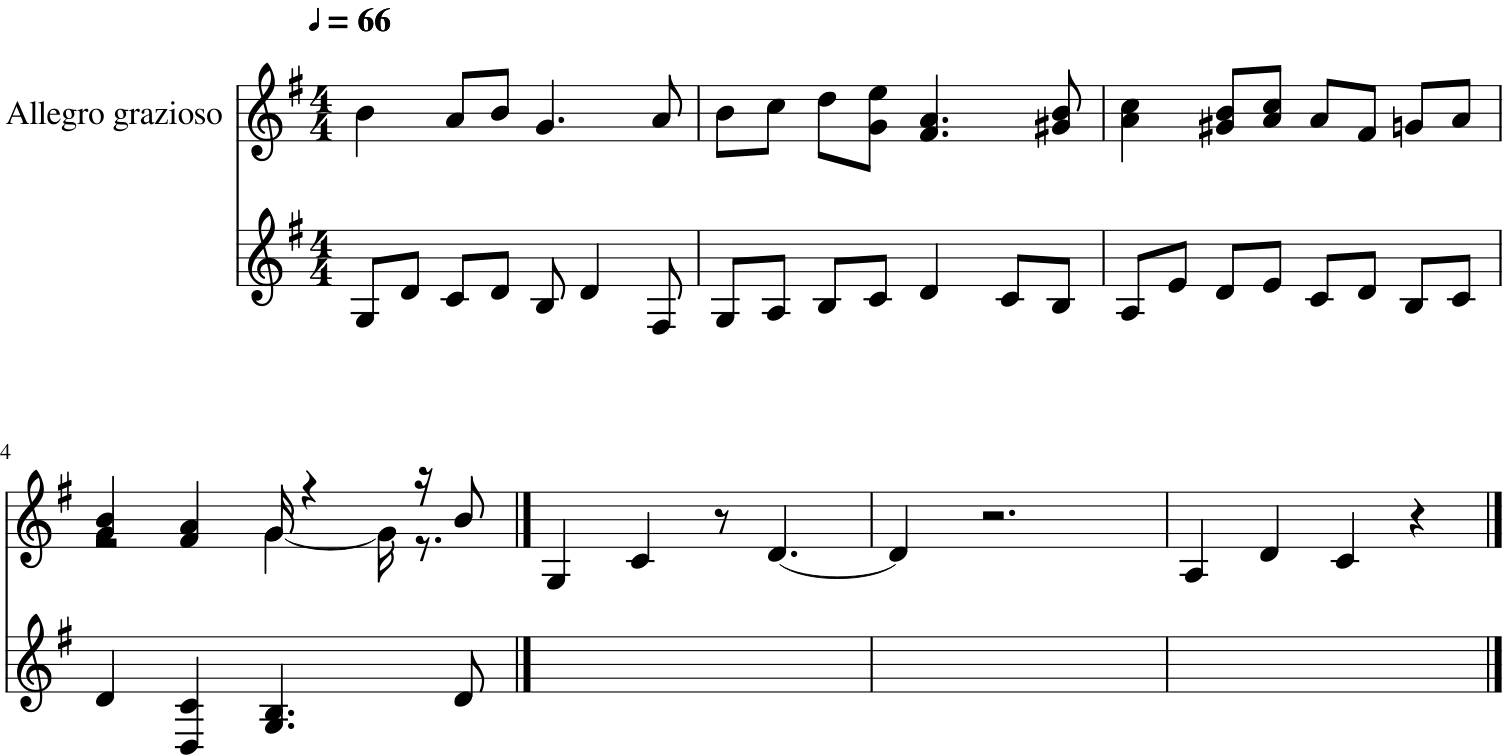

PosixPath('/content/drive/MyDrive/CSCI4155Project/Music/test.musicxml')

In [22]:
# Takes midi song and converts to a stream that can be rendered as sheet music.
parsed = music21.converter.parse('Input1-allegro-grazioso.mid')

# Shows in notebook.
parsed.show()

# Writes as xml, so... could be worse.
parsed.write(fp='test')

In [23]:
# Play some mosaics
sf2_path = "font.sf2"  # path to sound font file
midi_file = "ExampleOutput1.mid" # song to play .

# Play the midi file.
music = PrettyMIDI(midi_file=midi_file)
waveform = music.fluidsynth(sf2_path=sf2_path)
Audio(waveform, rate=44100)


Output hidden; open in https://colab.research.google.com to view.

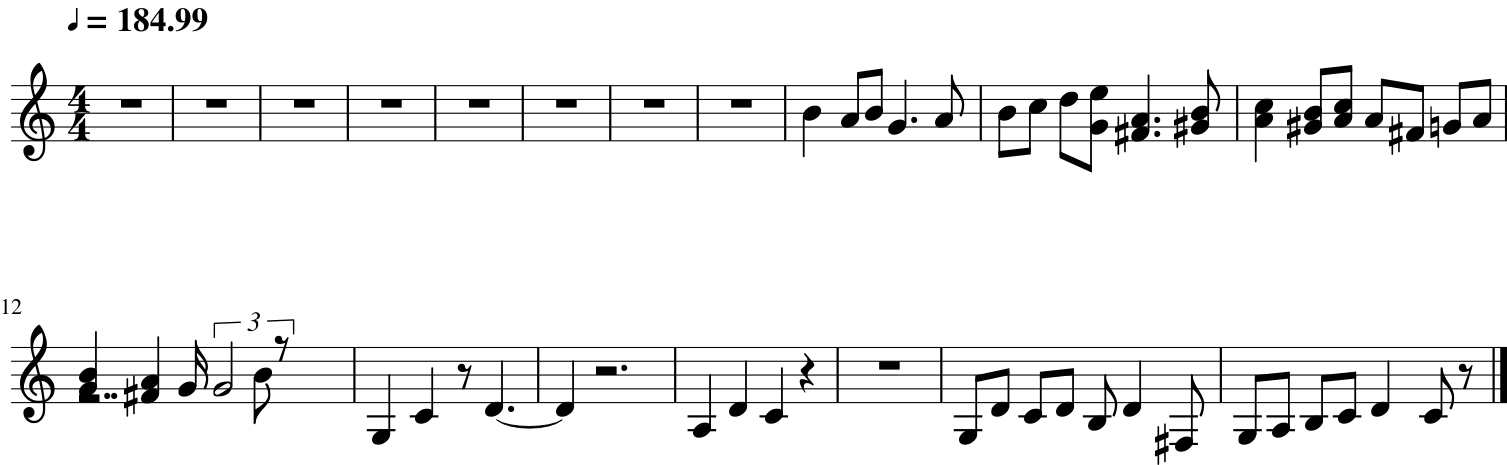

PosixPath('/content/drive/MyDrive/CSCI4155Project/Music/test.musicxml')

In [25]:
import music21

# Takes midi song and converts to a stream that can be rendered as sheet music.
parsed = music21.converter.parse('ExampleOutput1.mid')

# Shows in notebook.
parsed.show()

# Writes as xml, so... could be worse.
parsed.write(fp='test')